<a href="https://colab.research.google.com/github/AnshikaPrajapati/CodeSoft_project/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data collecting**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
titanic_df = pd.read_csv('/content/drive/MyDrive/codesoft_dataset/titanic dataset.zip')

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic_df.shape

(418, 12)

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
#  Missing Values/Null Values Count
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

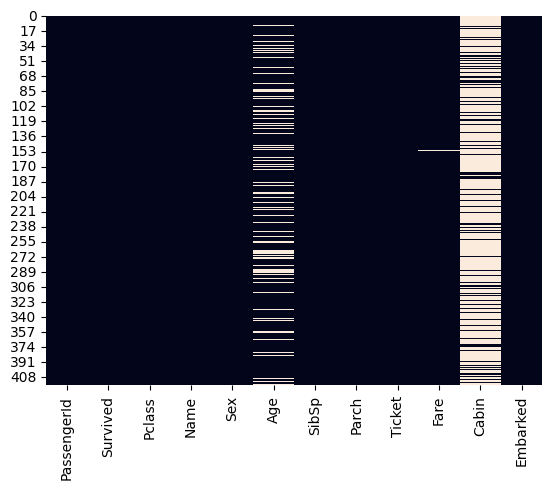

In [13]:
# Visualizing the missing values
sns.heatmap(titanic_df.isnull(),cbar=False)

In [14]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Handling Missing Values**

In [16]:
titanic_df=titanic_df.drop(columns='Cabin', axis=1)

In [18]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [21]:
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(),inplace=True)

In [37]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

In [38]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
# Converting categorical columns in int
titanic_df.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [44]:
# Final dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


**Data Visualization**

**Chart-1**

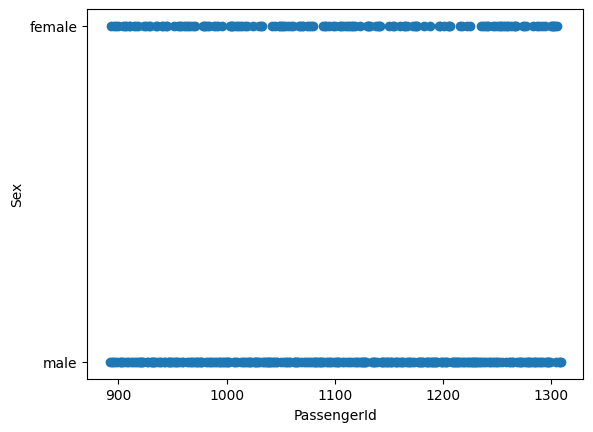

In [26]:
plt.scatter(titanic_df['PassengerId'],titanic_df['Sex'])
plt.xlabel('PassengerId')
plt.ylabel('Sex')
plt.show()

**Chart-2**

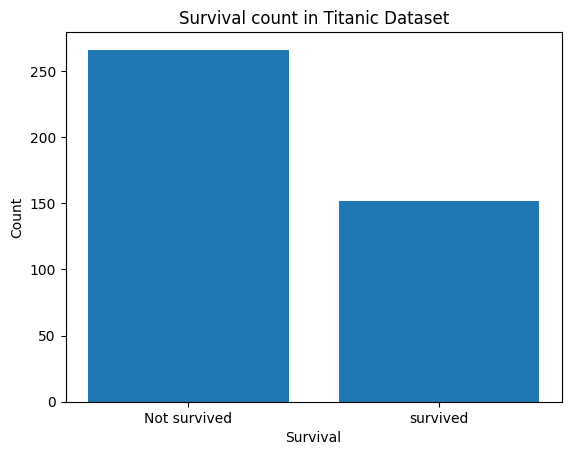

In [31]:
survival_counts= titanic_df['Survived'].value_counts()

labels = ['Not survived', 'survived']
values = survival_counts.values
plt.bar(labels, values)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival count in Titanic Dataset')
plt.show()

**Chart-3**

<function matplotlib.pyplot.show(close=None, block=None)>

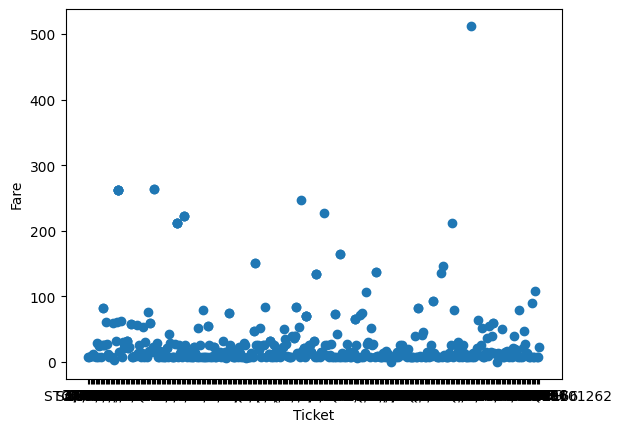

In [35]:
plt.scatter(df['Ticket'],df['Fare'])
plt.xlabel('Ticket')
plt.ylabel('Fare')
plt.show

**Chart-4**

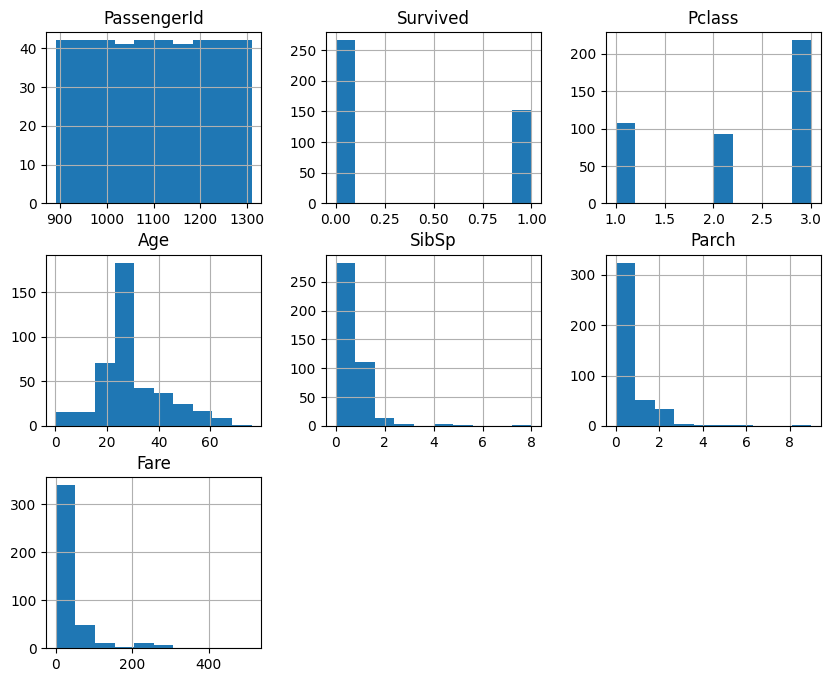

In [33]:
titanic_df.hist(figsize=(10,8))
plt.show()

**Chart-5**

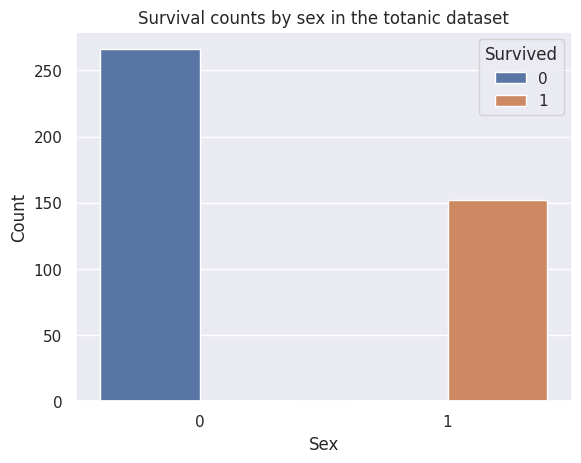

In [46]:
sns.set()
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival counts by sex in the totanic dataset')
plt.show()

**Chart-6** corelation heatmap

<ipython-input-34-bca465e490dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), annot= True)


Text(0.5, 1.0, 'co-relation of the columns')

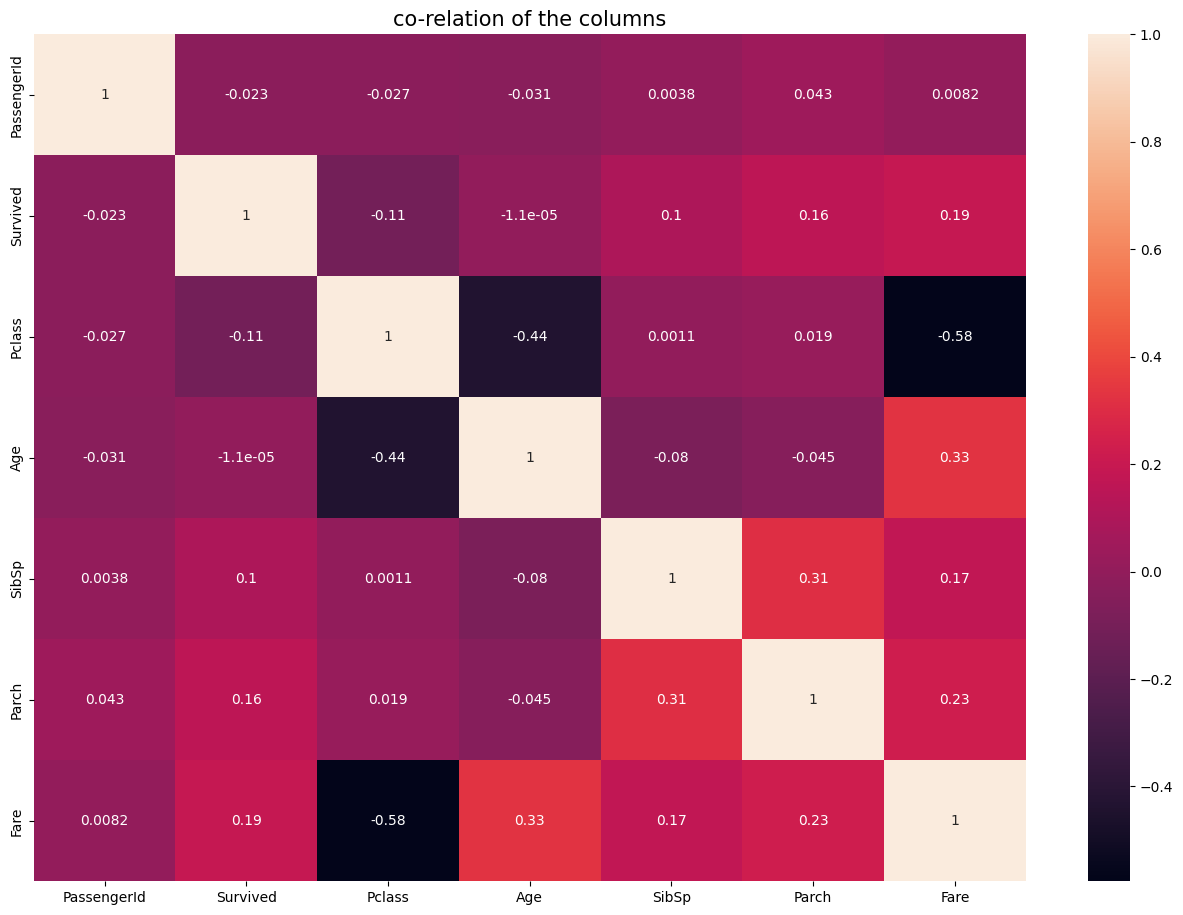

In [34]:
plt.figure(figsize = (16,11))
sns.heatmap(titanic_df.corr(), annot= True)
plt.title('co-relation of the columns', fontsize = 15)

**Seperating features & Target**

In [50]:
X= titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y= titanic_df['Survived']

In [51]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [52]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

**Training and Testing Data**

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [54]:
print(X.shape, x_train.shape, x_test.shape)

(418, 7) (334, 7) (84, 7)


**Model Training**

In [55]:
model = LogisticRegression()

In [56]:
model.fit(x_train, y_train)

LogisticRegression()

**Model Evaluation**

Accuracy Score




In [57]:
x_train_prediction = model.predict(x_train)

In [58]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [59]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [61]:
print("Accuracy score of training data : " , training_data_accuracy)

Accuracy score of training data :  1.0


In [62]:
# Accuracy score of test data
x_test_prediction = model.predict(x_test)

In [63]:
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [65]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [66]:
print("Accuracy score of test data:", test_data_accuracy)

Accuracy score of test data: 1.0
